In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import io
import re
from random import randint
import time
from IPython.display import HTML
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
headers = { "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9", 
            "Accept-Encoding": "gzip, deflate, br", 
            "Accept-Language" : "pl-PL,pl;q=0.9,en-US;q=0.8,en;q=0.7",
            "Upgrade-Insecure-Requests": "1", 
            "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/100.0.4896.127 Safari/537.36"}

In [ ]:
#prepare the file
dataFile = io.open('mieszkania_krakow.txt','w',encoding='utf-8')

for i in range (0, 600, 30):
    currentPage = 'https://sprzedajemy.pl/krakow/nieruchomosci/mieszkania?inp_text%5Bv%5D=strony+z+mieszkaniami&inp_text%5Bn%5D=1&sort=inp_srt_score_dscore_d&offset=' + str(i)
    r = requests.get(currentPage)
    soup = BeautifulSoup(r.text, 'lxml')
    flats = soup.find('ul', class_ = 'list normal').find_all('li', id = re.compile("^offer"))
    for flat in flats:
            #website
            website = f"https://sprzedajemy.pl{flat.find('a', href=True)['href']}"
            #print(website)
            try: 
                dataFile.write(website + ',')
            except:
                dataFile.write('n/a,')
            
            #city
            try:
                city_with_tabs = flat.find('a', class_ = 'location').find('strong', class_ = 'city').text
                city = re.sub(r"[\n\t\s]*", "", city_with_tabs)
                dataFile.write(city + ',')
            except:
                dataFile.write('n/a,')
                
            #district
            try:
                district = flat.find('a', class_ = 'location').span.text
                dataFile.write(district+',')
            except:
                dataFile.write('n/a,')
                
            #description
            try:
                description_with_tabs = flat.h2.text
                description = re.sub(r"[\n\t]*", "", description_with_tabs).strip().replace(',','.')
                dataFile.write(description + ',')
            except:
                dataFile.write('n/a,')

            #price
            try:
                price_with_tabs = flat.find('span', class_ = 'price').text
                price = re.sub(r"[\n\t\s]*", "", price_with_tabs).replace(',','.')
                dataFile.write(price + '')
            except:
                dataFile.write('n/a')
             
            r = requests.get(website)
            soup = BeautifulSoup(r.text, 'lxml')
            attribute_list = soup.find('ul', class_ = 'attribute-list')
            strongs = attribute_list.find_all('strong')
            att = ''
            for s in strongs:
                att += ','                
                att += s.text.replace(',','.') 
            print(att)
            dataFile.write(att)               
            dataFile.write('\n')
            
            #random_int = randint(2,5)
            #print(f'SLEEPING for {random_int} sec!')
            #time.sleep(random_int)
            
    #print(f"Parsed {i+30} offers")
dataFile.close()

In [3]:
df = pd.read_csv('mieszkania_krakow.txt')
columns = []
columns.append("Link")
columns.append("Miasto")
columns.append("Dzielnica")
columns.append("Opis")
columns.append("Cena")
columns.append("Oferta od")
columns.append("Rynek")
columns.append("Cena za m2")
columns.append("Powierzchnia")
columns.append("Zabudowa")
columns.append("Liczba pokoi")
columns.append("Material budynku")
columns.append("Pokrycie dachu")
columns.append("Ogrzewanie")
columns.append("Rok budowy")
columns.append("Forma wlasnosci")
columns.append("Pietro")
columns.append("Liczba pieter")
'''
 [
    "Link", "Miasto", "Dzielnica", "Opis", "Cena", 
    "Ofertaod", "Rynek", "Cenazam2", 'Powierzchnia", "Zabudowa", 
    "Liczba pokoi", "Material budynku", "Pokrycie dachu", "Ogrzewanie", "Rok budowy", 
    "Forma wlasnosci", "Pietro", "Liczba pieter"
] '''
df.columns = columns

In [4]:
df.head()

,Link,Miasto,Dzielnica,Opis,Cena,Oferta od,Rynek,Cena za m2,Powierzchnia,Zabudowa,Liczba pokoi,Material budynku,Pokrycie dachu,Ogrzewanie,Rok budowy,Forma wlasnosci,Pietro,Liczba pieter
0,https://sprzedajemy.pl/mieszkanie-krakow-racla...,Kraków,NaN,Mieszkanie Kraków Racławicka - okolice 37.56 m...,570912zł,firmy,pierwotny,15199 zł/m²,37.56 m²,blok,2,inne,-,-,2022,własność,2,-
1,https://sprzedajemy.pl/mieszkanie-krakow-okoli...,Kraków,NaN,Mieszkanie Kraków okolice ul. Wyki 54.79m2 3 p...,567077zł,firmy,pierwotny,10350 zł/m²,54.79 m²,-,3,inne,-,-,2023,własność,1,-
2,https://sprzedajemy.pl/oferta-sprzedazy-mieszk...,Kraków,NaN,Oferta sprzedaży mieszkania Kraków Saska - oko...,741091zł,firmy,pierwotny,10900 zł/m²,67.99 m²,blok,3,inne,-,-,2021,własność,3,-
3,https://sprzedajemy.pl/mieszkanie-66-89m2-4-po...,Kraków,NaN,Mieszkanie 66.89m2 4-pokojowe Kraków okolice u...,712379zł,firmy,pierwotny,10650 zł/m²,66.89 m²,-,4,inne,-,-,2023,własność,4,-
4,https://sprzedajemy.pl/mieszkanie-krakow-racla...,Kraków,NaN,Mieszkanie Kraków Racławicka - okolice 37.22m2...,569466zł,firmy,pierwotny,15300 zł/m²,37.22 m²,blok,2,inne,-,-,2022,własność,3,-


In [5]:
df.replace('-', np.NaN, inplace=True)
df.isna().sum()

Link                  0
Miasto                0
Dzielnica           551
Opis                  0
Cena                  0
Oferta od             0
Rynek                 0
Cena za m2            1
Powierzchnia          0
Zabudowa            205
Liczba pokoi          6
Material budynku    141
Pokrycie dachu      592
Ogrzewanie          581
Rok budowy            4
Forma wlasnosci      27
Pietro               97
Liczba pieter       592
dtype: int64

In [6]:
#drop columns that have a lot of missing values: dzielnica, zabudowa, material budynku, pokrycie dachu, forma wlasnosci, pietro, liczba pieter
drop_columns = ["Dzielnica", "Zabudowa", "Material budynku", "Pokrycie dachu", "Ogrzewanie", "Forma wlasnosci", "Pietro", "Liczba pieter"]
df = df.drop(columns = drop_columns)

In [7]:
#duplicate rows 
duplicate = df[df.duplicated()]
#duplicate

In [8]:
df = df.drop_duplicates()
df = df.dropna()

In [9]:
df.dtypes

Link            object
Miasto          object
Opis            object
Cena            object
Oferta od       object
Rynek           object
Cena za m2      object
Powierzchnia    object
Liczba pokoi    object
Rok budowy      object
dtype: object

In [10]:
df_clean = df.copy()

In [11]:
df_clean['Cena'] = df['Cena'].str.replace('zł','')
df_clean['Cena'] = df_clean['Cena'].astype(str).astype(int)

In [12]:
df_clean['Cena za m2'] = df_clean['Cena za m2'].str.replace('zł/m²','')
df_clean['Cena za m2'] = df_clean['Cena za m2'].astype(str).astype(int)

In [13]:
df_clean['Powierzchnia'] = df_clean['Powierzchnia'].str.replace('m²','')
df_clean['Powierzchnia'] = df_clean['Powierzchnia'].astype(str).astype(float)

In [14]:
df_clean['Rok budowy'] = df_clean['Rok budowy'].astype(str).astype(int)

In [15]:
df_clean.dtypes

Link             object
Miasto           object
Opis             object
Cena              int32
Oferta od        object
Rynek            object
Cena za m2        int32
Powierzchnia    float64
Liczba pokoi     object
Rok budowy        int32
dtype: object

<AxesSubplot:ylabel='Rok budowy'>

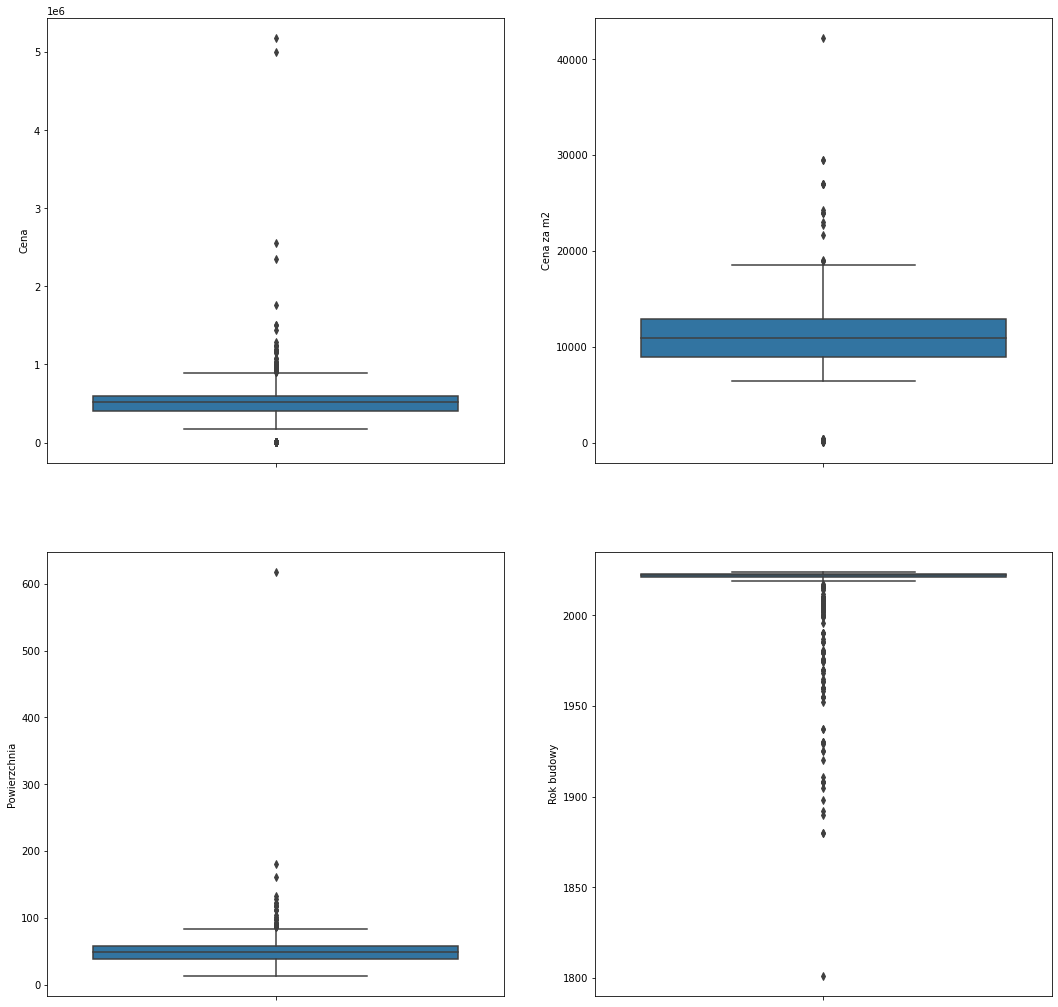

In [16]:
plt.figure(figsize=(18,18))
plt.subplot(2,2,1)
sns.boxplot(y=df_clean["Cena"])
plt.subplot(2,2,2)
sns.boxplot(y=df_clean["Cena za m2"])
plt.subplot(2,2,3)
sns.boxplot(y=df_clean["Powierzchnia"])
plt.subplot(2,2,4)
sns.boxplot(y=df_clean["Rok budowy"])

In [17]:
continuous_cols = ['Cena', 'Cena za m2', 'Powierzchnia', 'Rok budowy']
df_clean[continuous_cols].describe().transpose().round(2)

,count,mean,std,min,25%,50%,75%,max
Cena,584.0,514876.75,397207.26,2000.0,401377.50,518281.00,599000.00,5180000.00
Cena za m2,584.0,10371.05,5025.14,37.0,8900.00,10880.00,12900.00,42199.00
Powierzchnia,584.0,51.27,30.63,12.8,38.75,49.11,57.29,618.11
Rok budowy,584.0,2012.97,25.78,1801.0,2021.00,2022.00,2023.00,2024.00


In [18]:
df["Miasto"].value_counts()

Kraków    584
Name: Miasto, dtype: int64

In [19]:
df["Oferta od"].value_counts()

firmy               578
osoby prywatnej       6
Name: Oferta od, dtype: int64

In [20]:
df["Rynek"].value_counts()

pierwotny     459
wtórny        125
Name: Rynek, dtype: int64

In [21]:
df["Liczba pokoi"].value_counts()

2      260
3      196
1       80
4       38
5        6
7        3
11       1
Name: Liczba pokoi, dtype: int64